In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [2]:
#!python -m spacy download en_core_web_md

In [3]:
import pandas
apple=pd.read_csv("apple.txt",error_bad_lines=False)

b'Skipping line 6: expected 1 fields, saw 14\n'


In [4]:
apple

,x
0,It's amazing..... battery last around 10 -12 h...
1,Finally a MacBook possession. Got it in 50k in...
2,Best Laptop under 60k. If you don't want any a...
3,Pros:1. Light weight and super fast response t...
4,""""
5,I am very upset about the product as I checked...
6,Reason for 1 star is I ot an defective piece. ...
7,Got the Apple Macbook air on amazon discount s...
8,White line coming on screen in just three mont...
9,"Bought this product recently on 5 April, was w..."


In [5]:
apple = [x.strip() for x in apple.x] # remove both the leading and the trailing characters
apple = [x for x in apple if x] # removes empty strings, because they are considered in Python as False
apple[0:10]

["It's amazing..... battery last around 10 -12 hrs.....best laptop for students and coders",
 "Finally a MacBook possession. Got it in 50k in Diwali sale. Technically good laptop.Good News.luxury product, niche technology, good battery life, reliable machine (other laptops crash and become defunct in 6-10 years), no anti-virus required, security of data and transactions much better. Terrific sense of possession & pride.Bad News. Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!), all printers are not compatible (e.g. the most economical MFD laser printer RICOH SP 111 can't be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master it by wo

In [6]:
# Joining the list into one string/text
text = ' '.join(apple)
text

'It\'s amazing..... battery last around 10 -12 hrs.....best laptop for students and coders Finally a MacBook possession. Got it in 50k in Diwali sale. Technically good laptop.Good News.luxury product, niche technology, good battery life, reliable machine (other laptops crash and become defunct in 6-10 years), no anti-virus required, security of data and transactions much better. Terrific sense of possession & pride.Bad News. Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!), all printers are not compatible (e.g. the most economical MFD laser printer RICOH SP 111 can\'t be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master it by worki

In [7]:
#we are removing any punctuation marks
no_punc_text = text.translate(str.maketrans('', '', string.punctuation)) #with arguments (x, y, z) where 'x' and 'y'
# must be equal-length strings and characters in 'x'
# are replaced by characters in 'y'. 'z'
# is a string (string.punctuation here)
no_punc_text

'Its amazing battery last around 10 12 hrsbest laptop for students and coders Finally a MacBook possession Got it in 50k in Diwali sale Technically good laptopGood Newsluxury product niche technology good battery life reliable machine other laptops crash and become defunct in 610 years no antivirus required security of data and transactions much better Terrific sense of possession  prideBad News Problems will be there if you are switching from windows based system  very less space in hard disk no CD drive inability to transfer data from Mac to your existing external hard disc unless you format it apps are mostly paid and re unreasonably expensive no free apps which are available otherwise on google play store even the angry bird costs Rs 400  all printers are not compatible eg the most economical MFD laser printer RICOH SP 111 cant be used huge compatibility issues with Pages MS Word and Keynote powerpoint unless you master it by working on these still mostly the document and slides ei

In [8]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [9]:
#Tokenization
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
print(text_tokens[0:50])

['Its', 'amazing', 'battery', 'last', 'around', '10', '12', 'hrsbest', 'laptop', 'for', 'students', 'and', 'coders', 'Finally', 'a', 'MacBook', 'possession', 'Got', 'it', 'in', '50k', 'in', 'Diwali', 'sale', 'Technically', 'good', 'laptopGood', 'Newsluxury', 'product', 'niche', 'technology', 'good', 'battery', 'life', 'reliable', 'machine', 'other', 'laptops', 'crash', 'and', 'become', 'defunct', 'in', '610', 'years', 'no', 'antivirus', 'required', 'security', 'of']


In [10]:
len(text_tokens)

3444

In [11]:
#Remove stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

my_stop_words = stopwords.words('english')
my_stop_words.append('the')
clean_tokens = [word for word in text_tokens if not word in my_stop_words]
print(clean_tokens[0:40])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['Its', 'amazing', 'battery', 'last', 'around', '10', '12', 'hrsbest', 'laptop', 'students', 'coders', 'Finally', 'MacBook', 'possession', 'Got', '50k', 'Diwali', 'sale', 'Technically', 'good', 'laptopGood', 'Newsluxury', 'product', 'niche', 'technology', 'good', 'battery', 'life', 'reliable', 'machine', 'laptops', 'crash', 'become', 'defunct', '610', 'years', 'antivirus', 'required', 'security', 'data']


In [12]:
#Noramalize the data
lower_words = [x.lower() for x in clean_tokens]
print(lower_words[0:25])

['its', 'amazing', 'battery', 'last', 'around', '10', '12', 'hrsbest', 'laptop', 'students', 'coders', 'finally', 'macbook', 'possession', 'got', '50k', 'diwali', 'sale', 'technically', 'good', 'laptopgood', 'newsluxury', 'product', 'niche', 'technology']


In [13]:
#Stemming, removing suffixes and crudely reducing words to its root form wihout considering context.

from nltk.stem.porter import *
p_stemmer = PorterStemmer()

for word in lower_words:
    print(word+' --> '+p_stemmer.stem(word))


its --> it
amazing --> amaz
battery --> batteri
last --> last
around --> around
10 --> 10
12 --> 12
hrsbest --> hrsbest
laptop --> laptop
students --> student
coders --> coder
finally --> final
macbook --> macbook
possession --> possess
got --> got
50k --> 50k
diwali --> diwali
sale --> sale
technically --> technic
good --> good
laptopgood --> laptopgood
newsluxury --> newsluxuri
product --> product
niche --> nich
technology --> technolog
good --> good
battery --> batteri
life --> life
reliable --> reliabl
machine --> machin
laptops --> laptop
crash --> crash
become --> becom
defunct --> defunct
610 --> 610
years --> year
antivirus --> antiviru
required --> requir
security --> secur
data --> data
transactions --> transact
much --> much
better --> better
terrific --> terrif
sense --> sens
possession --> possess
pridebad --> pridebad
news --> news
problems --> problem
switching --> switch
windows --> window
based --> base
system --> system
less --> less
space --> space
hard --> hard
disk

In [14]:
# initializing spacy english module,keeping only tagger component for lemmatization.
nlp = spacy.load('en', disable=['parser', 'ner']) 

In [15]:
# reversing tokenization because tokenization is by default performed in spacy along with lemmatiztion.
doc = nlp(' '.join(clean_tokens))
print(doc[0:40])

Its amazing battery last around 10 12 hrsbest laptop students coders Finally MacBook possession Got 50k Diwali sale Technically good laptopGood Newsluxury product niche technology good battery life reliable machine laptops crash become defunct 610 years antivirus required security data


In [16]:
lemmas = [token.lemma_ for token in doc]#getting base root word with respect to context.
print(lemmas)

['-PRON-', 'amazing', 'battery', 'last', 'around', '10', '12', 'hrsb', 'laptop', 'student', 'coder', 'finally', 'MacBook', 'possession', 'Got', '50k', 'Diwali', 'sale', 'technically', 'good', 'laptopgood', 'Newsluxury', 'product', 'niche', 'technology', 'good', 'battery', 'life', 'reliable', 'machine', 'laptop', 'crash', 'become', 'defunct', '610', 'year', 'antivirus', 'require', 'security', 'datum', 'transaction', 'much', 'well', 'terrific', 'sense', 'possession', 'prideBad', 'News', 'problem', 'switch', 'window', 'base', 'system', 'less', 'space', 'hard', 'disk', 'cd', 'drive', 'inability', 'transfer', 'datum', 'Mac', 'exist', 'external', 'hard', 'disc', 'unless', 'format', 'app', 'mostly', 'pay', 'unreasonably', 'expensive', 'free', 'apps', 'available', 'otherwise', 'google', 'play', 'store', 'even', 'angry', 'bird', 'cost', 'r', '400', 'printer', 'compatible', 'eg', 'economical', 'MFD', 'laser', 'printer', 'RICOH', 'SP', '111', 'can', 'not', 'use', 'huge', 'compatibility', 'issue',

#### Feature Extraction

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

In [18]:
print(vectorizer.vocabulary_)

{'pron': 638, 'amazing': 70, 'battery': 120, 'last': 460, 'around': 96, '10': 0, '12': 6, 'hrsb': 398, 'laptop': 453, 'student': 765, 'coder': 181, 'finally': 324, 'macbook': 491, 'possession': 612, 'got': 364, '50k': 34, 'diwali': 252, 'sale': 687, 'technically': 781, 'good': 361, 'laptopgood': 456, 'newsluxury': 543, 'product': 630, 'niche': 545, 'technology': 782, 'life': 469, 'reliable': 664, 'machine': 493, 'crash': 207, 'become': 124, 'defunct': 228, '610': 44, 'year': 880, 'antivirus': 81, 'require': 673, 'security': 700, 'datum': 219, 'transaction': 818, 'much': 533, 'well': 855, 'terrific': 787, 'sense': 706, 'pridebad': 622, 'news': 542, 'problem': 626, 'switch': 774, 'window': 862, 'base': 118, 'system': 775, 'less': 466, 'space': 740, 'hard': 378, 'disk': 247, 'cd': 167, 'drive': 257, 'inability': 412, 'transfer': 819, 'mac': 490, 'exist': 294, 'external': 306, 'disc': 245, 'unless': 827, 'format': 336, 'app': 84, 'mostly': 527, 'pay': 588, 'unreasonably': 828, 'expensive':

In [19]:
print(vectorizer.get_feature_names()[50:100])


['9th', 'able', 'accidental', 'accounting', 'act', 'adapt', 'add', 'adding', 'additionaly', 'advantage', 'affordable', 'after', 'again', 'againcontacte', 'ahead', 'air', 'all', 'almost', 'along', 'also', 'amazing', 'amazingnice', 'amazon', 'amazoni', 'among', 'and', 'android', 'angle', 'angry', 'another', 'answer', 'antivirus', 'anyone', 'anything', 'app', 'appario', 'apple', 'appleappleapple', 'apples', 'application', 'apprehensive', 'appropriate', 'apps', 'appsnumber', 'april', 'arenot', 'around', 'ask', 'aspect', 'atleast']


In [20]:
print(X.toarray().shape)

(2102, 885)


#### Let's see how can bigrams and trigrams can be included here

In [21]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(apple)

In [22]:
print(vectorizer_ngram_range.vocabulary_)

{'it': 42, 'battery': 14, 'around': 11, 'best': 16, 'laptop': 47, 'for': 27, 'and': 7, 'macbook': 50, 'got': 31, 'in': 38, 'sale': 69, 'good': 30, 'product': 67, 'other': 66, 'years': 97, 'no': 56, 'of': 59, 'better': 17, 'will': 91, 'be': 15, 'if': 35, 'you': 98, 'are': 10, 'from': 28, 'windows': 92, 'very': 84, 'hard': 33, 'to': 82, 'mac': 49, 'external': 25, 'which': 89, 'on': 61, 'even': 24, 'the': 78, 'all': 3, 'not': 57, 'can': 21, 'issues': 41, 'with': 93, 'working': 94, 'still': 75, 'or': 65, 'have': 34, 'need': 55, 'an': 6, 'buy': 20, 'some': 74, 'one': 63, 'at': 13, 'its': 44, 'then': 79, 'would': 95, 'but': 19, 'like': 48, 'if you': 36, 'you are': 99, 'of the': 60, 'if you are': 37, 'want': 85, 'any': 8, 'just': 45, 'now': 58, 'about': 0, 'that': 77, 'me': 52, 'fine': 26, 'want to': 86, 'amazon': 5, 'cost': 22, 'is': 39, 'is not': 40, 'am': 4, 'as': 12, 'my': 54, 'was': 88, 'warranty': 87, 'service': 71, 'they': 80, 'quality': 68, 'this': 81, 'months': 53, 'year': 96, 'scree

In [23]:
print(vectorizer_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['about', 'after', 'air', 'all', 'am', 'amazon', 'an', 'and', 'any', 'apple', 'are', 'around', 'as', 'at', 'battery', 'be', 'best', 'better', 'bought', 'but', 'buy', 'can', 'cost', 'display', 'even', 'external', 'fine', 'for', 'from', 'get', 'good', 'got', 'great', 'hard', 'have', 'if', 'if you', 'if you are', 'in', 'is', 'is not', 'issues', 'it', 'it is', 'its', 'just', 'keyboard', 'laptop', 'like', 'mac', 'macbook', 'macbook air', 'me', 'months', 'my', 'need', 'no', 'not', 'now', 'of', 'of the', 'on', 'on this', 'one', 'only', 'or', 'other', 'product', 'quality', 'sale', 'screen', 'service', 'service center', 'so', 'some', 'still', 'stopped', 'that', 'the', 'then', 'they', 'this', 'to', 'using', 'very', 'want', 'want to', 'warranty', 'was', 'which', 'while', 'will', 'windows', 'with', 'working', 'would', 'year', 'years', 'you', 'you are']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 1 8 1]
 [1 0 0 ... 0 7 1]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 0]]


#### TFidf vectorizer

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 500)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(apple)
print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray())

['10', '12', '2017', '4k', '50k', 'about', 'about the', 'above', 'after', 'after using', 'again', 'air', 'all', 'also', 'am', 'amazing', 'amazon', 'an', 'and', 'and after', 'and is', 'and it', 'and the', 'and then', 'any', 'apple', 'apple product', 'apple service', 'apple support', 'apps', 'apps which', 'apps which are', 'april', 'are', 'are really', 'are way', 'around', 'as', 'as it', 'asked', 'asked for', 'at', 'at all', 'at the', 'at the price', 'automatically', 'available', 'awesome', 'back', 'backup', 'bad', 'battery', 'battery life', 'be', 'be fine', 'be ignored', 'be it', 'be it the', 'be used', 'because', 'been', 'being', 'best', 'best laptop', 'best laptop for', 'better', 'better graphics', 'better than', 'bit', 'board', 'book', 'both', 'bought', 'bought it', 'bought it on', 'bought this', 'bought this macbook', 'box', 'build', 'but', 'but can', 'but can be', 'but if', 'but if you', 'butter', 'button', 'buy', 'buying', 'by', 'can', 'can be', 'can be ignored', 'can get', 'canno

####  Generate wordcloud

In [25]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

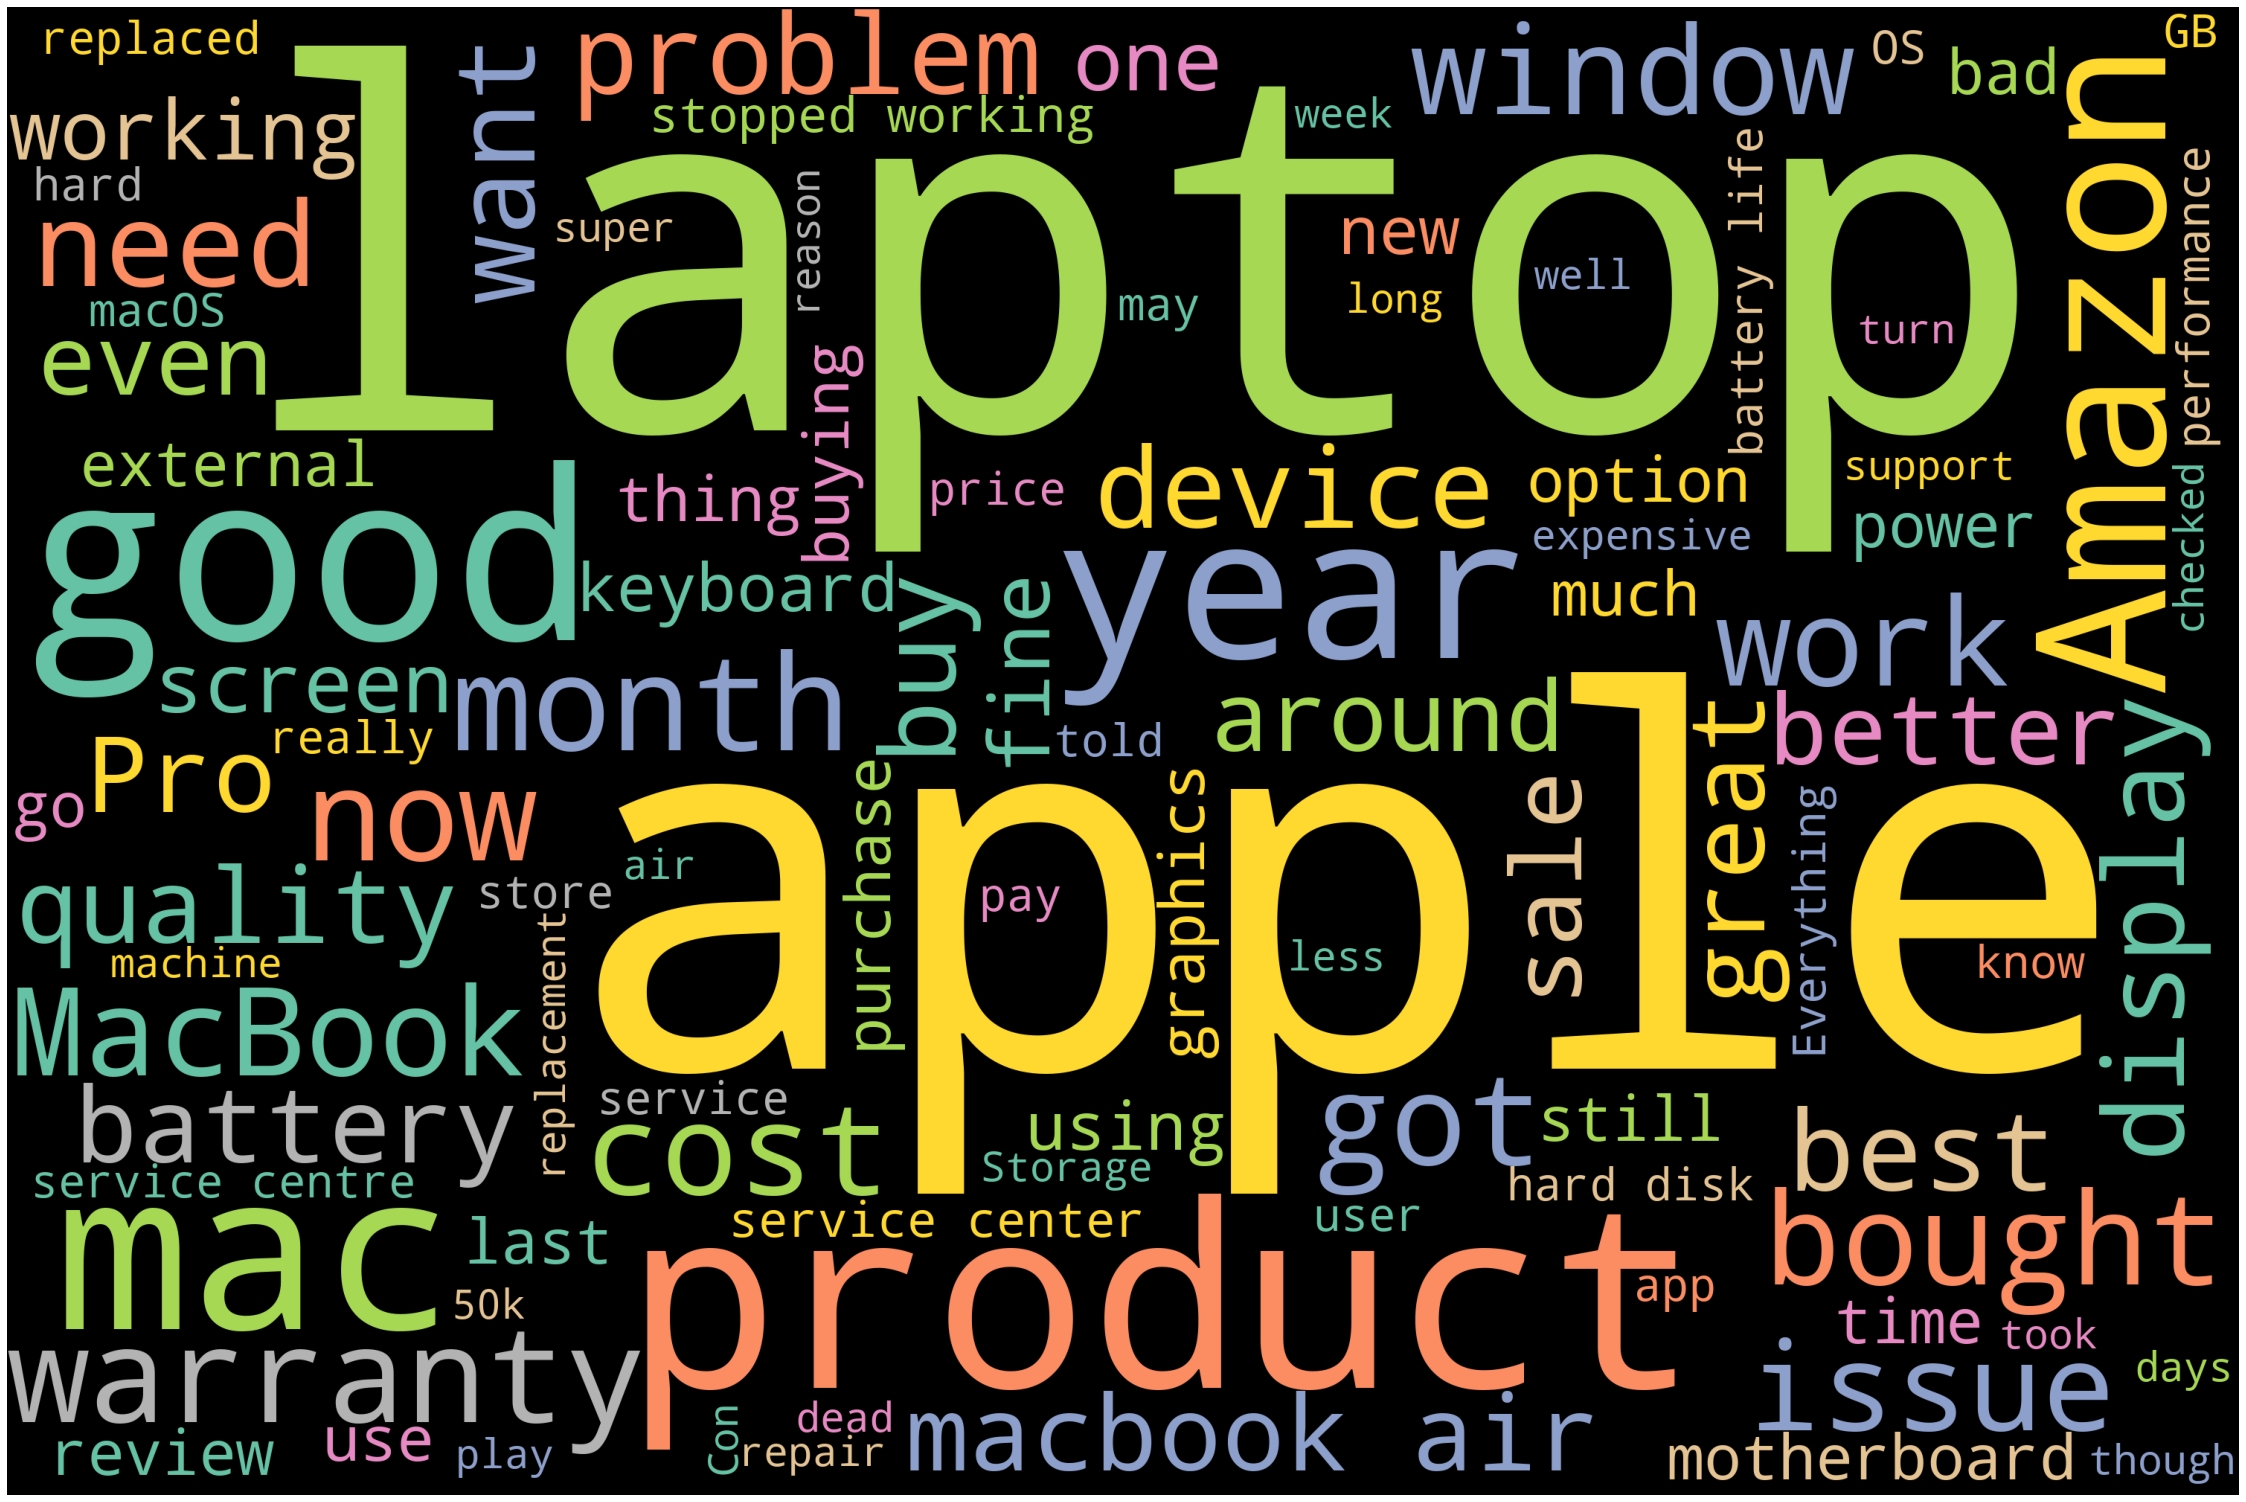

In [26]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)

In [27]:
#Emotion Analysis
import nltk
afinn =pd.read_csv("Afinn.csv",sep =',',encoding='latin-1',engine="python")
#affin is a file having both postive words and negtive words with predefined score

In [28]:
df_apple = pd.read_csv("apple.txt",error_bad_lines=False)

b'Skipping line 6: expected 1 fields, saw 14\n'


In [30]:
df_apple= [x.strip() for x in df_apple.x] # remove both the leading and the trailing characters
df_apple = [x for x in df_apple if x] # removes empty strings, because they are considered in Python as False
df_apple[0:10]

["It's amazing..... battery last around 10 -12 hrs.....best laptop for students and coders",
 "Finally a MacBook possession. Got it in 50k in Diwali sale. Technically good laptop.Good News.luxury product, niche technology, good battery life, reliable machine (other laptops crash and become defunct in 6-10 years), no anti-virus required, security of data and transactions much better. Terrific sense of possession & pride.Bad News. Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!), all printers are not compatible (e.g. the most economical MFD laser printer RICOH SP 111 can't be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master it by wo

In [31]:
one_block = df_apple[1]
one_block

"Finally a MacBook possession. Got it in 50k in Diwali sale. Technically good laptop.Good News.luxury product, niche technology, good battery life, reliable machine (other laptops crash and become defunct in 6-10 years), no anti-virus required, security of data and transactions much better. Terrific sense of possession & pride.Bad News. Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!), all printers are not compatible (e.g. the most economical MFD laser printer RICOH SP 111 can't be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master it by working on these (still mostly the document and slides either do not open in windows environment

In [33]:
##Part Of Speech Tagging
#nlp = spacy.load('en')
nlp = spacy.load('en_core_web_sm')

one_block = df_apple[1]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [34]:
one_block

"Finally a MacBook possession. Got it in 50k in Diwali sale. Technically good laptop.Good News.luxury product, niche technology, good battery life, reliable machine (other laptops crash and become defunct in 6-10 years), no anti-virus required, security of data and transactions much better. Terrific sense of possession & pride.Bad News. Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!), all printers are not compatible (e.g. the most economical MFD laser printer RICOH SP 111 can't be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master it by working on these (still mostly the document and slides either do not open in windows environment

In [38]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [40]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(df_apple))
sentences[5:15]

['), all printers are not compatible (e.g.',
 "the most economical MFD laser printer RICOH SP 111 can't be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master it by working on these (still mostly the document and slides either do not open in windows environment or have distortion issues).",
 'you need to spend extra for an external CD writer and tp buy a carry bag.',
 'Mac con not be connected to most of the projectors unless you buy some connectors, which are expensive and theres no clarity which one to buy and from where.',
 "you can't connect it to your TV, the ports are different and again theres no clarity - customer support, manuals or help section are silent !",
 'Marketing strategy for Indian market, if at all has been planned, has been very bad.',
 'If these critical issues (and a few more not mentioned here) are handled properly, the Mac can sweep away other laptops in India.',
 "Presently, it doesn't seem to be happening.Overall V

In [41]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,It's amazing..... battery last around 10 -12 h...
1,Got it in 50k in Diwali sale.
2,Technically good laptop.Good News.luxury produ...
3,Terrific sense of possession & pride.Bad News.
4,Problems will be there if you are switching fr...
...,...
182,You can get one of the best movie experiences ...
183,Overall I would it a 4.5/5.
184,"I got a great deal on this laptop, which I hav..."
185,I got it not only on discount but also was abl...


In [42]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [43]:
affinity_scores


{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [44]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [45]:
# test that it works
calculate_sentiment(text = 'bad')

-3

In [46]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [47]:
sent_df

,sentence,sentiment_value
0,It's amazing..... battery last around 10 -12 h...,7
1,Got it in 50k in Diwali sale.,0
2,Technically good laptop.Good News.luxury produ...,7
3,Terrific sense of possession & pride.Bad News.,4
4,Problems will be there if you are switching fr...,-11
...,...,...
182,You can get one of the best movie experiences ...,3
183,Overall I would it a 4.5/5.,0
184,"I got a great deal on this laptop, which I hav...",3
185,I got it not only on discount but also was abl...,0


In [48]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10)

0    17
1     7
2    31
3     7
4    65
5     7
6    47
7    16
8    29
9    26
Name: word_count, dtype: int64

In [49]:
sent_df.sort_values(by='sentiment_value').tail(10)

,sentence,sentiment_value,word_count
110,"The build is super strong, the operating syste...",5,10
64,I hope this comment can help to save somebody’...,6,10
103,The switch was inspired by the awesome reviews...,6,13
46,Ships with macOS sierra but update is availabl...,6,86
59,I use this for music production and it works a...,7,30
2,Technically good laptop.Good News.luxury produ...,7,31
0,It's amazing..... battery last around 10 -12 h...,7,17
178,MERITS..IT IS BEST IN ITS PERFORMANCE..SOUND Q...,10,43
151,..So now I m working with the external keyboar...,17,113
86,"All are Gud.. For now.. Apple,apple,apple, tha...",24,184


In [50]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    187.000000
mean       0.983957
std        3.433666
min      -11.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       24.000000
Name: sentiment_value, dtype: float64

In [51]:
sent_df[sent_df['sentiment_value']>=10].head()

,sentence,sentiment_value,word_count
86,"All are Gud.. For now.. Apple,apple,apple, tha...",24,184
151,..So now I m working with the external keyboar...,17,113
178,MERITS..IT IS BEST IN ITS PERFORMANCE..SOUND Q...,10,43


In [52]:
sent_df['index']=range(0,len(sent_df))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


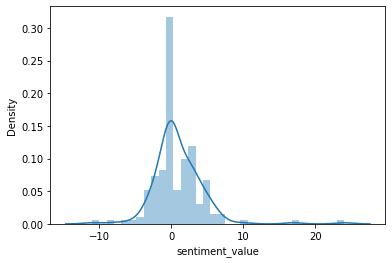

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])

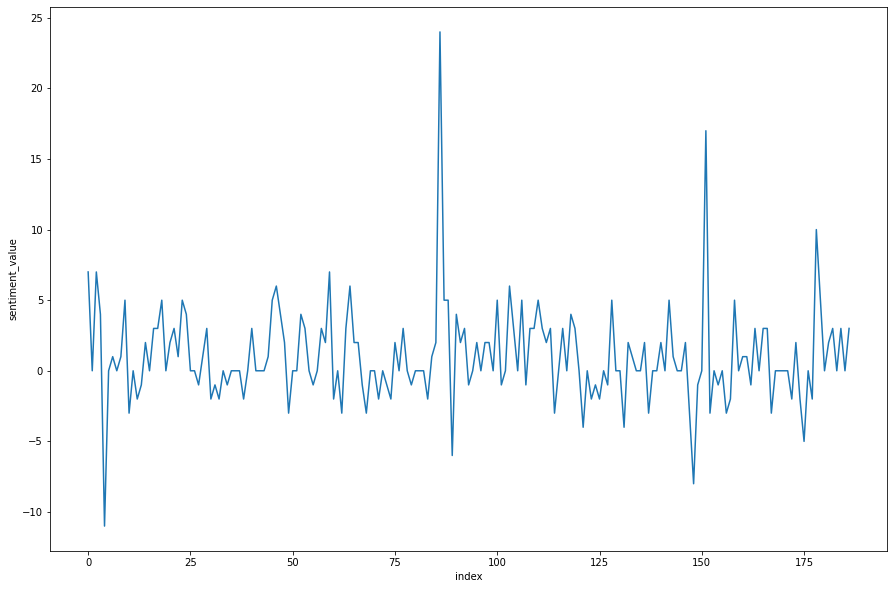

In [54]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

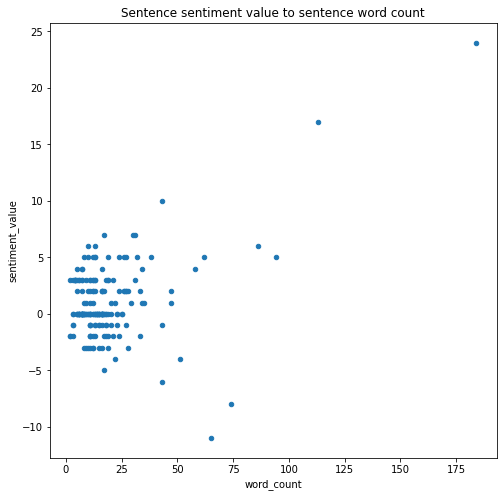

In [55]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')